# Importing libraries

In [4]:
import tensorflow
import cv2,os
import numpy as np
from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten,Dropout
from keras.layers import Conv2D,MaxPooling2D
from keras.callbacks import ModelCheckpoint
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

os.environ['KMP_DUPLICATE_LIB_OK']='True'

# Importing Dataset

In [2]:
data_path='Combined Dataset'
categories=os.listdir(data_path)
labels=[i for i in range(len(categories))]

label_dict=dict(zip(categories,labels)) #empty dictionary
print(label_dict)
print(categories)
print(labels)

{'COVID': 0, 'NORMAL': 1, 'PNEUMONIA': 2}
['COVID', 'NORMAL', 'PNEUMONIA']
[0, 1, 2]


# resizing image

In [4]:
img_size=100
data=[]
target=[]

for category in categories:
    folder_path=os.path.join(data_path,category)
    img_names=os.listdir(folder_path)
        
    for img_name in img_names:
        img_path=os.path.join(folder_path,img_name)
        img=cv2.imread(img_path)

        try:
            resized=cv2.resize(img,(img_size,img_size))
            #resizing the image  into 100x100, since we need a fixed common size for all the images in the dataset
            data.append(resized)
            target.append(label_dict[category])
            #appending the image and the label(categorized) into the list (dataset)
        except Exception as e:
            print('Exception:',e)
            #if any exception rasied, the exception will be printed here. And pass to the next image

# Noramlizing image

In [5]:
data=np.array(data)/255.0
data=np.reshape(data,(data.shape[0],img_size,img_size,3))
target=np.array(target)
from keras.utils import np_utils
new_target=np_utils.to_categorical(target)

In [6]:
new_target.shape

(9396, 3)

In [7]:
data.shape

(9396, 100, 100, 3)

In [8]:
data.shape[1:]

(100, 100, 3)

# Appyling CNN

In [5]:
cnn_model=Sequential()

#First Convolution Layer with 32 filters,2x2 kernel size,
cnn_model.add(Conv2D(32,kernel_size=2,activation='relu',input_shape=(100,100,3)))

#First Max-Pooling Layer
cnn_model.add(MaxPooling2D(pool_size=2))

#Adding Dropout to the layer
cnn_model.add(Dropout(0.2))

#Second Convolution Layer with 16 filters,2x2 kernel size,
cnn_model.add(Conv2D(16,kernel_size=2,activation='relu'))

#First Max-Pooling Layer
cnn_model.add(MaxPooling2D(pool_size=2))

#Adding Dropout to the layer
cnn_model.add(Dropout(0.2))

#Third Convolution Layer with 8 filters,2x2 kernel size,
cnn_model.add(Conv2D(8,kernel_size=2,activation='relu'))

#First Max-Pooling Layer
cnn_model.add(MaxPooling2D(pool_size=2))

#Flattening the layer before entering the dense layers
cnn_model.add(Flatten())

#Fully connected Neural Network
#First Dense layer
cnn_model.add(Dense(units=128,activation='relu'))

#Output layer
cnn_model.add(Dense(units=3,activation='sigmoid'))

cnn_model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [10]:
cnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 99, 99, 32)        416       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 49, 49, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 49, 49, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 48, 48, 16)        2064      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 24, 24, 16)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 24, 24, 16)        0

In [11]:
train_data,test_data,train_target,test_target=train_test_split(data,new_target,test_size=0.1)

In [12]:
train_data.shape

(8456, 100, 100, 3)

In [13]:
train_target.shape

(8456, 3)

# Training model

In [14]:
history=cnn_model.fit(train_data,train_target,epochs=10,validation_split=0.2)

Epoch 1/10
212/212 [==============================] - 84s 185ms/step - loss: 0.3484 - accuracy: 0.7623 - val_loss: 0.2086 - val_accuracy: 0.8966
Epoch 2/10
212/212 [==============================] - 34s 161ms/step - loss: 0.1732 - accuracy: 0.9082 - val_loss: 0.1766 - val_accuracy: 0.9149
Epoch 3/10
212/212 [==============================] - 34s 160ms/step - loss: 0.1451 - accuracy: 0.9237 - val_loss: 0.1551 - val_accuracy: 0.9255
Epoch 4/10
212/212 [==============================] - 34s 158ms/step - loss: 0.1284 - accuracy: 0.9311 - val_loss: 0.1235 - val_accuracy: 0.9415
Epoch 5/10
212/212 [==============================] - 33s 158ms/step - loss: 0.1145 - accuracy: 0.9419 - val_loss: 0.1169 - val_accuracy: 0.9456
Epoch 6/10
212/212 [==============================] - 33s 155ms/step - loss: 0.1082 - accuracy: 0.9475 - val_loss: 0.1440 - val_accuracy: 0.9249
Epoch 7/10
212/212 [==============================] - 33s 157ms/step - loss: 0.0977 - accuracy: 0.9520 - val_loss: 0.1057 - val_ac

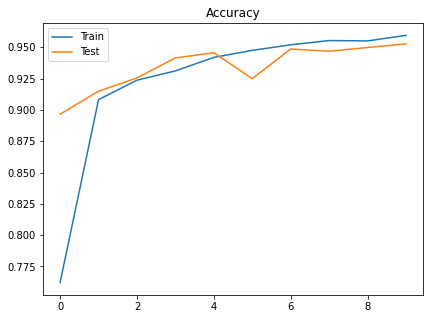

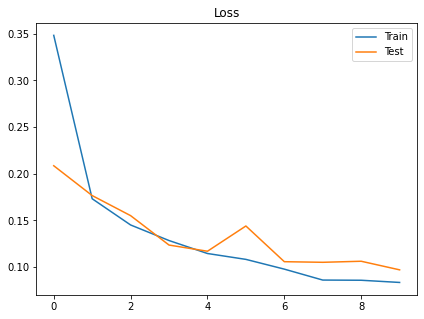

In [15]:
plt.figure(figsize=(15,5))
plt.subplot(121)
plt.plot(history.history['accuracy'],label='Train')
plt.plot(history.history['val_accuracy'],label='Test')
plt.title("Accuracy")
plt.legend()

plt.figure(figsize=(15,5))
plt.subplot(122)
plt.plot(history.history['loss'],label='Train')
plt.plot(history.history['val_loss'],label='Test')
plt.title("Loss")
plt.legend()

In [16]:
score, acc = cnn_model.evaluate(test_data, test_target,verbose=2, batch_size= 256)
print('Accuracy:', acc)

4/4 - 1s - loss: 0.0942 - accuracy: 0.9574 - 1s/epoch - 342ms/step
Accuracy: 0.957446813583374


In [17]:
from sklearn.metrics import confusion_matrix
y_test_arg=np.argmax(test_target,axis=1)
Y_pred = np.argmax(cnn_model.predict(test_data),axis=1)
print('Confusion Matrix')
print(confusion_matrix(y_test_arg, Y_pred))

30/30 [==============================] - 1s 35ms/step
Confusion Matrix
[[ 81   1   4]
 [  2 300  12]
 [  1  20 519]]


In [18]:
cnn_model.save('combined_model2.h5')

In [6]:
model_json = cnn_model.to_json()
with open('covid19_model_adv.json', 'w') as json_file:
  json_file.write(model_json)

print('Model saved to JSON format.')

Model saved to JSON format.


# Testing 

In [1]:
from keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import cv2
os.environ['KMP_DUPLICATE_LIB_OK']='True'

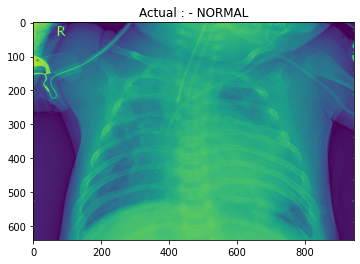

1/1 [==============================] - 0s 165ms/step
Accuracy: - 0.9997733235359192
Predicted: -  PNEUMONIA


In [6]:
dic = {0:'COVID', 1:'NORMAL', 2:'PNEUMONIA'}
model = load_model('combined_model2.h5')

#test_array = ["r'C:\Users\PAKSHAL JAIN\Downloads\ML project\Combined Dataset\PNEUMONIA\person1_bacteria_2.jpeg'","r'C:\Users\PAKSHAL JAIN\Downloads\ML project\Combined Dataset\NORMAL\IM-0001-0001.jpeg'","r'C:\Users\PAKSHAL JAIN\Downloads\ML project\Combined Dataset\COVID\01E392EE-69F9-4E33-BFCE-E5C968654078.jpeg'","r'C:\Users\PAKSHAL JAIN\Downloads\ML project\Combined Dataset\PNEUMONIA\person23_bacteria_101.jpeg'","r'#C:\Users\PAKSHAL JAIN\Downloads\ML project\Combined Dataset\PNEUMONIA\person558_bacteria_2328.jpeg'"]
#print(test_array[0])

model.make_predict_function()

def predict_label(img_path):
    i = image.load_img(img_path, target_size=(100,100))
    i = image.img_to_array(i)/255.0
    i = i.reshape(1, 100,100,3)
    predict_x=model.predict(i)
    classes_x=np.argmax(predict_x,axis=1)
    accuracy=float(np.max(predict_x,axis=1)[0])
    print("Accuracy: -",accuracy)
    return dic[classes_x[0]]



img = mpimg.imread(r"C:\Users\saura\Desktop\New_Images\Pneumonia\person1_virus_6.jpeg")
imgplot = plt.imshow(img)
plt.title("Actual : - NORMAL")
plt.show()
print("Predicted: - ",predict_label(r"C:\Users\saura\Desktop\New_Images\Pneumonia\person1_virus_6.jpeg"))

In [3]:
#p-C:\Users\saura\Documents\ML project\Combined Dataset\PNEUMONIA\person1_bacteria_2.jpeg
#n-C:\Users\saura\Documents\ML project\Combined Dataset\NORMAL\IM-0001-0001.jpeg
#c-C:\Users\saura\Documents\ML project\Combined Dataset\COVID\01E392EE-69F9-4E33-BFCE-E5C968654078.jpeg
#C:\Users\saura\Documents\ML project\Combined Dataset\PNEUMONIA\person23_bacteria_101.jpeg
#C:\Users\saura\Documents\ML project\Combined Dataset\PNEUMONIA\person558_bacteria_2328.jpeg

New_Images
#c-C:\Users\saura\Desktop\New_Images\Covid\1-s2.0-S1684118220300608-main.pdf-001.jpg
#c-C:\Users\saura\Desktop\New_Images\Covid\COVID-1002.png
#p-C:\Users\saura\Desktop\New_Images\Pneumonia\person1_virus_6.jpeg
#p-C:\Users\saura\Desktop\New_Images\Pneumonia\Viral Pneumonia-1005.png
#n-C:\Users\saura\Desktop\New_Images\Normal\IM-0001-0001.jpeg
#n-C:\Users\saura\Desktop\New_Images\Normal\Normal-1.png